In [11]:
# plot a sigmoid function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# datat generation

m = 100
w = np.array([[-6], [2], [1]])
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5 

In [25]:
y

matrix([[False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True

In [26]:
## C1, C2 할당, C1: y is true and C2: y is false

C1 = np.where(y == True)[0]
C0 = np.where(y == False)[0]

In [27]:
y = np.empty([m,1])

## y=1 when y was true, y=0 : when y was false
y[C1] = 1
y[C0] = 0

y

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

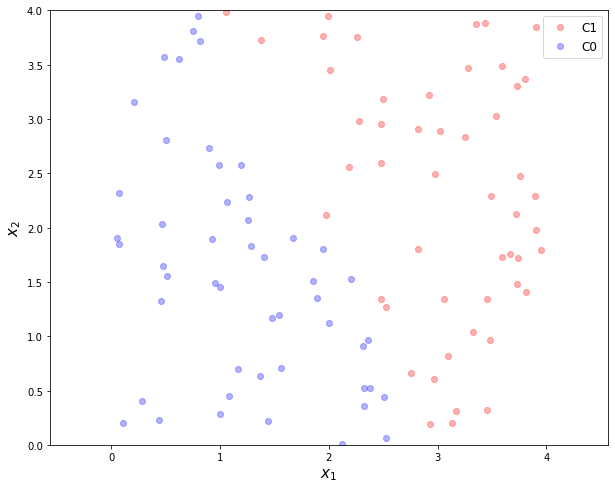

In [28]:
plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [29]:
# be careful with matrix shape

def h(x,w):
    return 1/(1 + np.exp(-x*w))

In [30]:
w = np.zeros([3,1])

alpha = 0.01

#Update 
for i in range(10000):   
    df = - X.T * (y - h(X,w))
    w -= alpha * df

print(w)

[[-32.25561907]
 [ 10.94542666]
 [  5.41870514]]


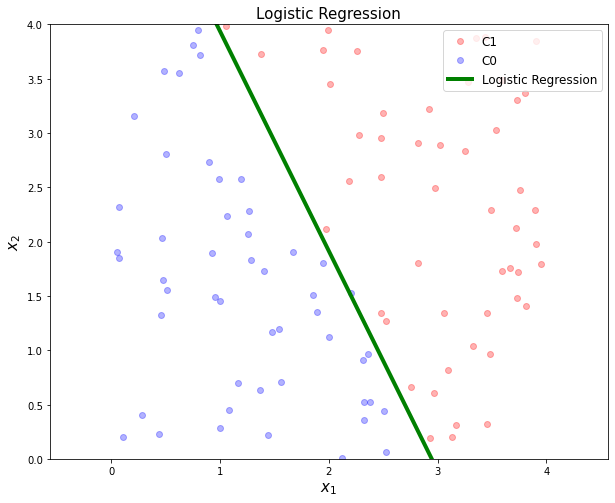

In [31]:
xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize = (10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [32]:
X = X[:,1:3]

X.shape

(100, 2)

In [33]:
from sklearn import linear_model

#L-BFGS:목적 함수 값과 목적 함수의 기울기를 사용하여 목적 함수의 (로컬) minimum을 찾는 방법
clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X,np.ravel(y))

LogisticRegression()

In [34]:
clf.coef_

array([[3.20548483, 1.439914  ]])

In [35]:
clf.intercept_

array([-9.40808378])

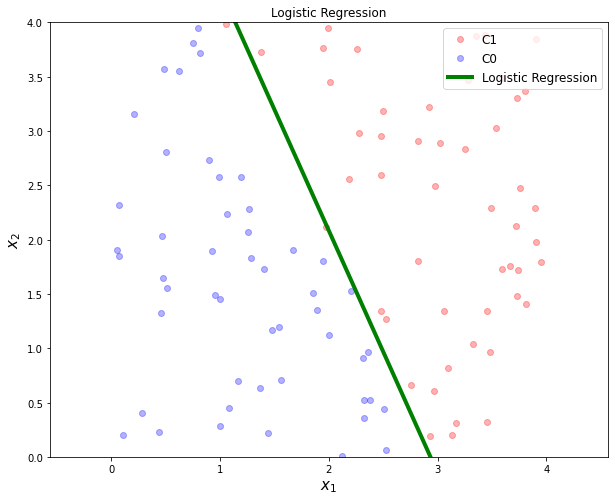

In [37]:
#allocate w0 ~ w2
w0 = clf.intercept_[0]
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [38]:
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

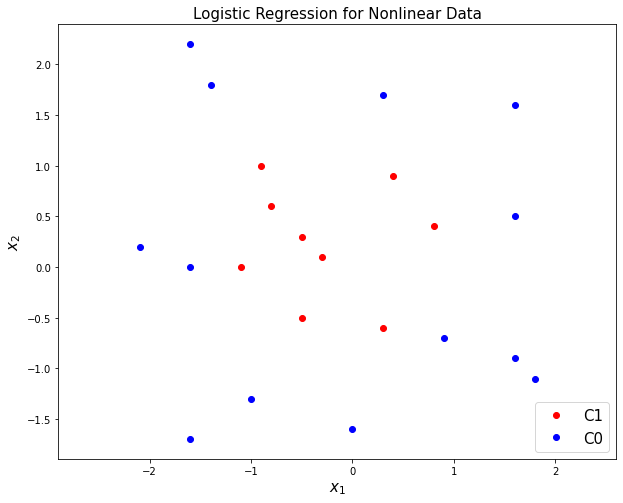

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('Logistic Regression for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.axis('equal')
plt.legend(loc = 4, fontsize = 15)
plt.show()

In [40]:
N = X1.shape[0]
M = X0.shape[0]

X = np.vstack([X1, X0])
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

m = N + M

Z = np.hstack([np.ones([m,1]), np.sqrt(2)*X[:,0], np.sqrt(2)*X[:,1], np.square(X[:,0]),
               np.sqrt(2)*np.multiply(X[:,0], X[:,1]), np.square(X[:,1])])

clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(Z,np.ravel(y))

LogisticRegression()

In [41]:
clf.coef_.shape

(1, 6)

In [42]:
clf.intercept_.shape

(1,)

In [43]:
w=clf.coef_.T
w0=clf.intercept_[0]

In [44]:
w.shape

(6, 1)

In [45]:
# to plot
[X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.1), np.arange(-3,3,0.1)) #Input points new

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

m = Xp.shape[0]
Zp = np.hstack([np.ones([m,1]), np.sqrt(2)*Xp[:,0], np.sqrt(2)*Xp[:,1], np.square(Xp[:,0]), 
                np.sqrt(2)*np.multiply(Xp[:,0], Xp[:,1]), np.square(Xp[:,1])])

In [49]:
# Decision boundary 
q = Zp * w + w0

# Boundary matrix

B = []
for i in range(m):
    if q[i, 0] > 0:
        B.append(Xp[i,:])
    
B = np.vstack(B) 
B

matrix([[-0.1, -1.1],
        [-0.6, -1. ],
        [-0.5, -1. ],
        ...,
        [-0.3,  1.6],
        [-0.2,  1.6],
        [-0.1,  1.6]])

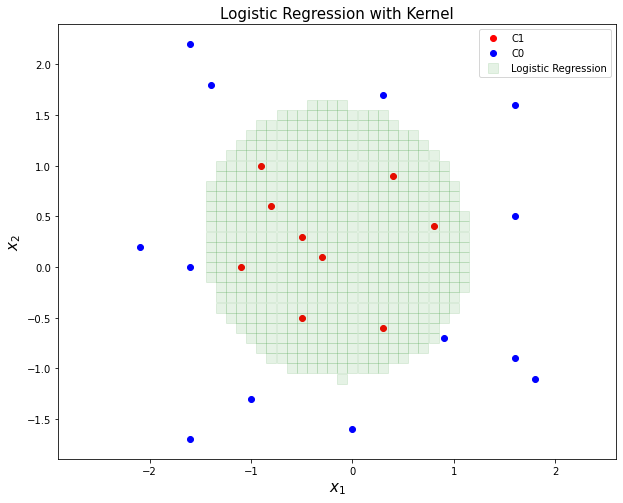

In [54]:
plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.plot(B[:,0], B[:,1], 'gs', markersize = 10, alpha = 0.1, label = 'Logistic Regression')
plt.title('Logistic Regression with Kernel', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.axis('equal')
plt.legend()
plt.show()